In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploratory Analysis

In [2]:
data_dir = os.path.join(os.path.curdir, "data")

beer_data = pd.read_csv(os.path.join(data_dir,'cleaned_beer_data.csv'), index_col=0)

In [3]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34134 entries,  Illustrated Man Dark Sour with Berries-Independence Brewing Co to ﻿Boji Blue Pale Ale-Okoboji Brewing Company
Data columns (total 23 columns):
ba_score    34134 non-null float64
ratings     34134 non-null int64
reviews     34134 non-null int64
perc_dev    34134 non-null float64
wants       34134 non-null int64
gots        34134 non-null int64
look        34134 non-null float64
smell       34134 non-null float64
taste       34134 non-null float64
feel        34134 non-null float64
link        34134 non-null object
brewery     34134 non-null object
abv         34134 non-null float64
score       34134 non-null float64
style       34134 non-null object
hoppy       34134 non-null int64
wheat       34134 non-null int64
rye         34134 non-null int64
german      34134 non-null int64
belgian     34134 non-null int64
british     34134 non-null int64
hue         34134 non-null int64
sour        34134 non-null int64
dtypes: float64(8)

In [4]:
numeric_beer_data = beer_data.drop(['link', 'brewery', 'style', 'score', 'reviews'], axis=1)

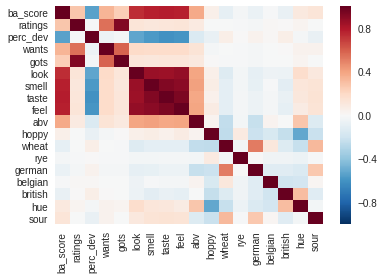

In [5]:
sns.heatmap(numeric_beer_data.corr())

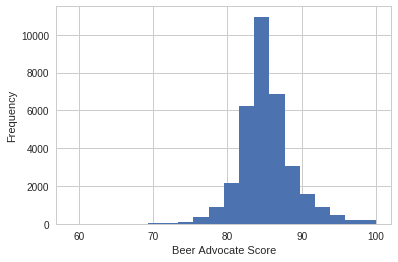

In [65]:
fig, ax = plt.subplots(1)

numeric_beer_data.ba_score.plot('hist', bins = 20, ax = ax)
ax.set_xlabel("Beer Advocate Score")

fig.savefig('ba_hist.png', fmt='png', dpi=600, bbox_inches='tight')

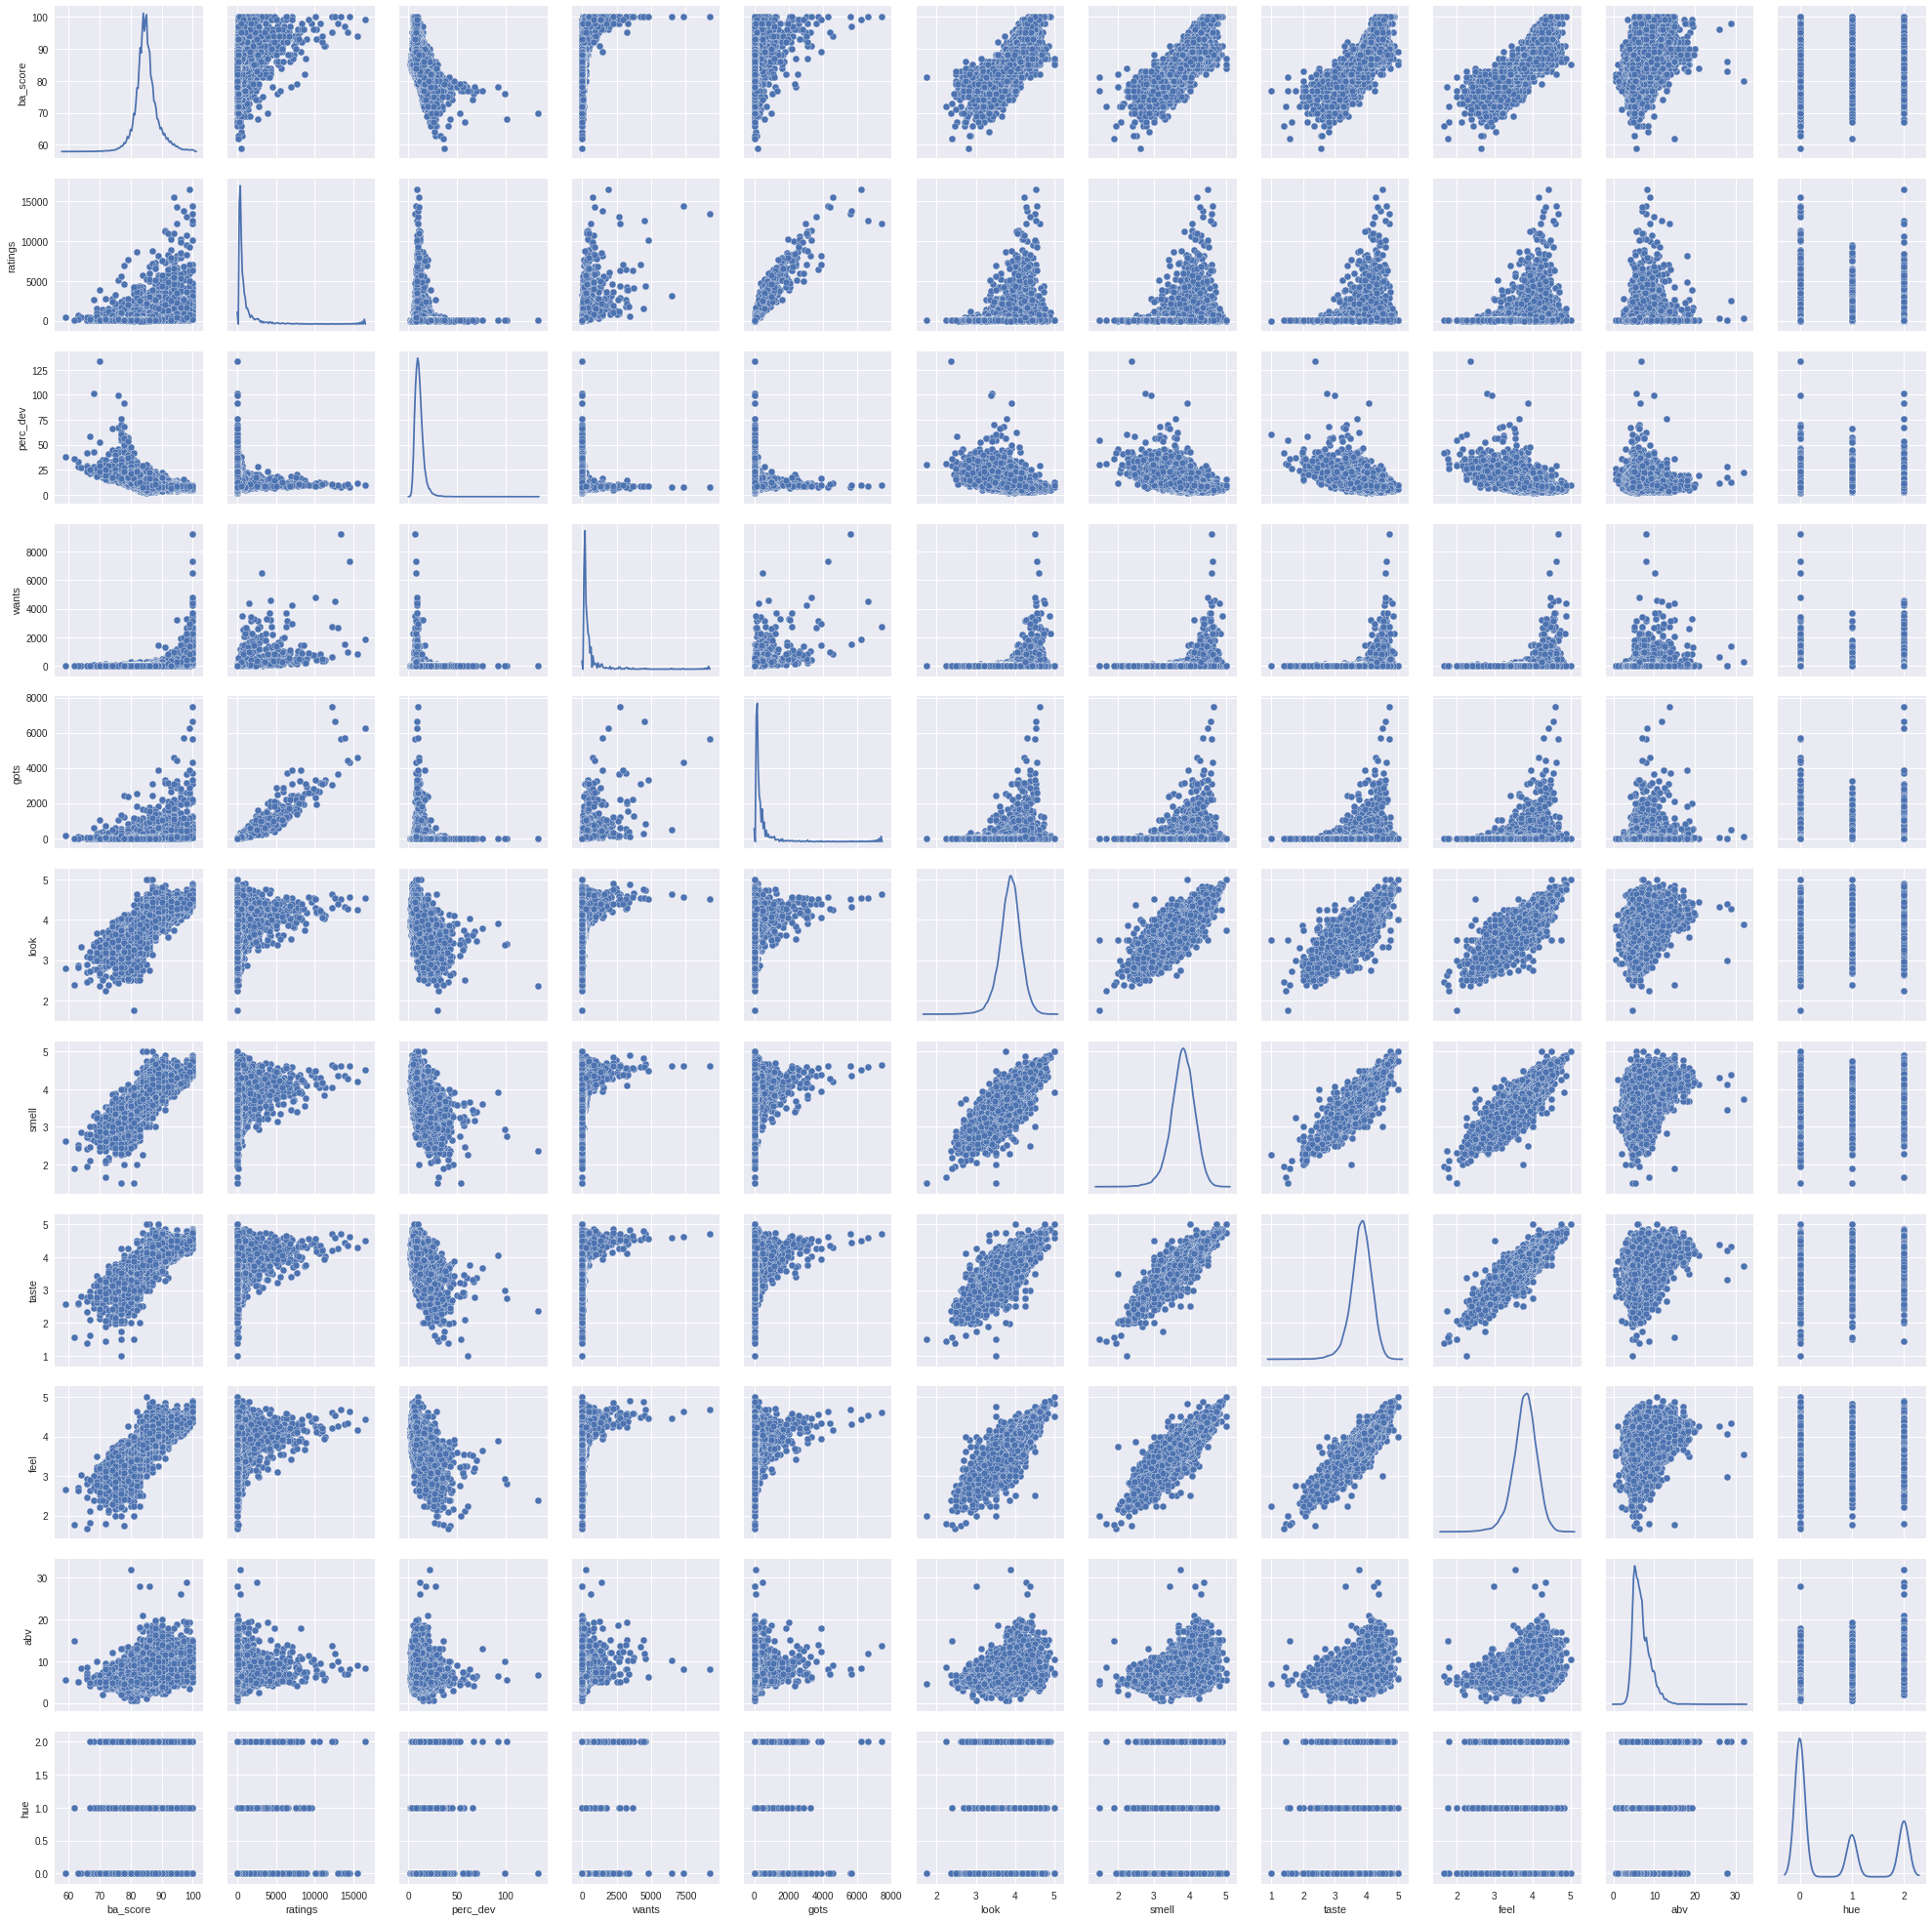

In [14]:
sns.pairplot(numeric_beer_data.drop(['hoppy', 'wheat', 'rye',
                                     'german', 'belgian', 'british',
                                     'sour'], axis=1), diag_kind='kde')

# Initial model testing

In [6]:
from sklearn import dummy, linear_model, ensemble, tree, model_selection


In [47]:
X, y = numeric_beer_data.drop('ba_score', axis=1), numeric_beer_data['ba_score']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .1, random_state=42)

In [8]:
models = {}
parameters = {}

models['dummy'] = dummy.DummyRegressor()
models['linear_model'] = linear_model.LinearRegression()
models['ridge_model'] = linear_model.Ridge()
models['lasso_model'] = linear_model.Lasso(alpha=.1)
models['robust_regression'] = linear_model.SGDRegressor(loss='huber',n_iter=5)
models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',n_iter=5)


models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
models['randomForest'] = ensemble.RandomForestRegressor()
models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()


for name,model in models.items():
    scores = model_selection.cross_val_score(model, X_train, y_train, n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print("STDev:" + str(np.std(scores)) + "\n")

Model: dummy
Score: -0.000103404572072
STDev:7.31224655569e-05

Model: linear_model
Score: 0.706521792628
STDev:0.0068821010957

Model: ridge_model
Score: 0.70652228866
STDev:0.00688558581927

Model: lasso_model
Score: 0.689736446385
STDev:0.0086552016234

Model: robust_regression
Score: -46.9864457228
STDev:61.3982667442

Model: eps_insensitive
Score: -365204.426503
STDev:509656.494912

Model: cart
Score: 0.839182530362
STDev:0.00263930631427

Model: extratrees
Score: 0.741205919405
STDev:0.00843115054161

Model: randomForest
Score: 0.87304031739
STDev:0.00173024194019

Model: adaboostedTrees
Score: 0.790594828556
STDev:0.00947305438282

Model: gradboostedTrees
Score: 0.882542732646
STDev:0.000956746955474



# Check importance of features in several models

## Linear Regression

In [9]:
linear_basic = models['linear_model'].fit(X_train, y_train)
coefs_linear = linear_basic.coef_
intercept_linear = linear_basic.intercept_
sorted(zip(X_train.columns, coefs_linear), key = lambda x: x[1], reverse=True)

[('smell', 2.4129347685550364),
 ('taste', 2.2994557826417821),
 ('look', 1.5414475982095546),
 ('feel', 1.5024614193130257),
 ('sour', 0.4121239271356949),
 ('abv', 0.11510070755110796),
 ('german', 0.10839108175265535),
 ('hoppy', 0.097101733249535693),
 ('british', 0.0067117985879440178),
 ('belgian', 0.0046959790253947586),
 ('wants', 0.0036166449755410911),
 ('ratings', 0.0016789236477608258),
 ('gots', -0.0040641328175448077),
 ('rye', -0.018442006016087087),
 ('hue', -0.01992186698734294),
 ('wheat', -0.030681109230456055),
 ('perc_dev', -0.10464465274640604)]

In [10]:
linear_basic.score(X_test, y_test)

0.71298199059273204

## Scale features

In [48]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

X_tr = std.transform(X_train)
X_te = std.transform(X_test)

## Scaled Linear Regression

In [12]:
linear_sc = models['linear_model'].fit(X_tr, y_train)
linear_coefs_sc = linear_sc.coef_
linear_intercept_sc = linear_sc.intercept_
sorted(zip(X_train.columns, linear_coefs_sc), key = lambda x: x[1], reverse=True)

[('ratings', 1.0039834921398041),
 ('smell', 0.78310624575722754),
 ('taste', 0.7661846728718712),
 ('wants', 0.55356959534108108),
 ('feel', 0.46447113154804381),
 ('look', 0.41779752681115639),
 ('abv', 0.23938983305433692),
 ('sour', 0.10512053113520337),
 ('hoppy', 0.047453670255776625),
 ('german', 0.02686513160109498),
 ('british', 0.0024865861793983979),
 ('belgian', 0.0017452878954659357),
 ('rye', -0.0017649804764115623),
 ('wheat', -0.0086781909128652995),
 ('hue', -0.016667201479908134),
 ('perc_dev', -0.48173435236264994),
 ('gots', -0.68465638581414434)]

In [13]:
models['linear_model'].score(X_te, y_test)

0.71298199059273215

## Lasso Regression

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler



alphavec = 10**np.linspace(-3,9,27)

lasso_model = LassoCV(alphas = alphavec, cv=10)
lasso_model.fit(X_tr,y_train)

coefs_lasso = lasso_model.coef_
coefs_lasso_sorted = sorted(zip(X_train.columns, coefs_lasso), key = lambda x: x[1], reverse=True)

In [15]:
lasso_model.alpha_

0.0028942661247167516

In [16]:
lasso_model.score(X_te, y_test)

0.71281112306642747

In [37]:
lasso_pred = lasso_model.predict(X_te)
np.sqrt(np.mean((lasso_pred - y_test)**2))

1.9729683612675994

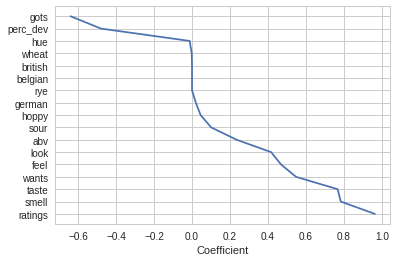

In [56]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1)
predictors = [coef_pair[0] for coef_pair in coefs_lasso_sorted]
coefs = [coef_pair[1] for coef_pair in coefs_lasso_sorted]

ax.plot(coefs, range(len(predictors)))
plt.yticks(range(len(predictors)), predictors)
ax.set_xlabel("Coefficient")

fig.savefig('coefficients_all.png', fmt='png', dpi=600, bbox_inches='tight')


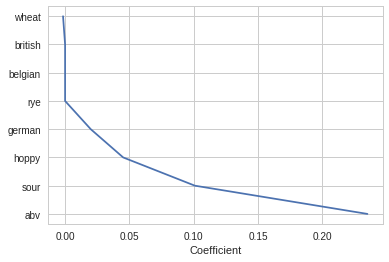

In [58]:
fig, ax = plt.subplots(1)
predictors = [coef_pair[0] for coef_pair in coefs_lasso_sorted[6:14]]
coefs = [coef_pair[1] for coef_pair in coefs_lasso_sorted[6:14]]

ax.plot(coefs, range(len(predictors)))
plt.yticks(range(len(predictors)), predictors)
ax.set_xlabel("Coefficient")

fig.savefig('coefficients_zoomed.png', fmt='png', dpi=600, bbox_inches='tight')

The variables rye, belgian, and british seem to be unimportant in Lasso regression.

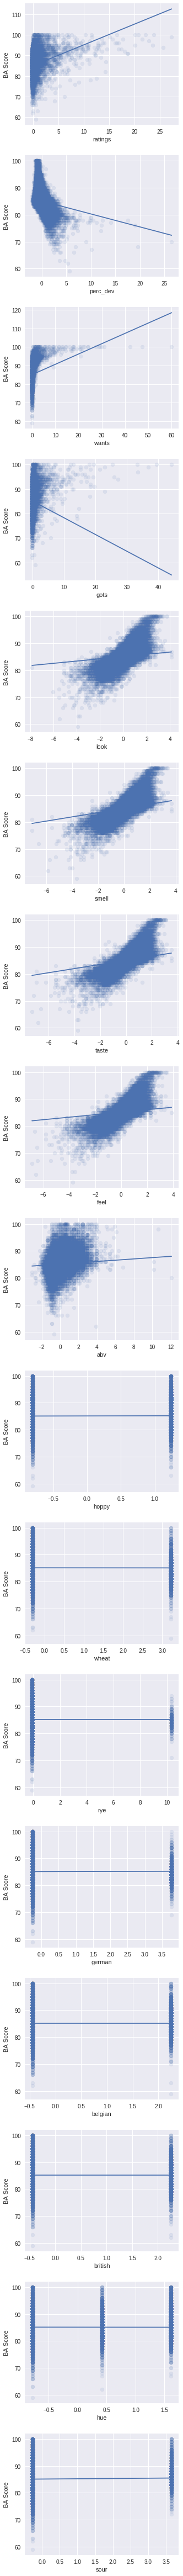

In [26]:
columns = X_train.columns
num_columns = len(columns)

fig, axes = plt.subplots(num_columns, 1, figsize=(5, 5*num_columns))
fig.subplots_adjust(hspace=0.25)

for i, column in enumerate(columns):
    current_x = X_tr[:, i]
    x_min = current_x.min()
    x_max = current_x.max()
    
    x_linear = np.linspace(x_min, x_max, 1001)
    axes[i].scatter(current_x, y_train, alpha=0.1)
    axes[i].plot(x_linear, linear_coefs_sc[i]*x_linear + linear_intercept_sc)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('BA Score')

## Random forest

In [27]:
coefs_rf = models['randomForest'].fit(X_train,y_train).feature_importances_
sorted(zip(X.columns,coefs_rf), key = lambda x:x[1], reverse=True)

[('taste', 0.53807648946333797),
 ('wants', 0.17433565045533844),
 ('ratings', 0.074611163022917065),
 ('smell', 0.059617541791923176),
 ('perc_dev', 0.059555647231616451),
 ('feel', 0.047384433286234519),
 ('look', 0.014733619127504139),
 ('abv', 0.012078259977185627),
 ('gots', 0.011599028778881075),
 ('hue', 0.0020212333178704694),
 ('hoppy', 0.0014341743253601905),
 ('belgian', 0.001140259677779023),
 ('british', 0.0010698123926091356),
 ('german', 0.0007784374813777637),
 ('wheat', 0.00077286510864751489),
 ('sour', 0.00065254971220681955),
 ('rye', 0.00013883484921061161)]

In [28]:
beer_forest = ensemble.RandomForestRegressor(n_estimators = 1000, min_samples_leaf=5,
                                    n_jobs=-1, max_features='auto')

In [29]:
beer_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [30]:
beer_forest.score(X_test, y_test)

0.88948810115708177

In [31]:
sorted(zip(X.columns,beer_forest.feature_importances_), key = lambda x:x[1], reverse=True)

[('taste', 0.55604376154194002),
 ('wants', 0.1784591498666136),
 ('ratings', 0.074717277914325947),
 ('smell', 0.059961080227711606),
 ('perc_dev', 0.056497087499227681),
 ('feel', 0.045208914051637204),
 ('look', 0.010049218334336479),
 ('abv', 0.0077201491113749543),
 ('gots', 0.0076289465195621313),
 ('hue', 0.0012803851330142426),
 ('hoppy', 0.001122972942428069),
 ('belgian', 0.00043695902566402451),
 ('british', 0.00041848445407357458),
 ('wheat', 0.00017438129265288856),
 ('sour', 0.00016591397185238918),
 ('german', 0.00011451525273671706),
 ('rye', 8.0286084878087717e-07)]

## Gradient Boosted Tree

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {'subsample':np.arange(.1,1,.2),
              'max_depth':[5,6],
              'learning_rate':np.arange(.01,.1,.01),
              'n_estimators':[500]}


beer_gradboost = ensemble.GradientBoostingRegressor()
grid_search = GridSearchCV(beer_gradboost, parameters, n_jobs=-2, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed: 38.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'subsample': array([ 0.1,  0.3,  0.5,  0.7,  0.9]), 'max_depth': [5, 6], 'learning_rate': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09]), 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [64]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None,
             subsample=0.30000000000000004, verbose=0, warm_start=False)

In [66]:
grid_search.best_estimator_.score(X_test, y_test)

0.89961582389363182

In [49]:
beer_gradboost_best = ensemble.GradientBoostingRegressor(learning_rate=0.02,
                                                         max_depth=6, n_estimators=500,
                                                         subsample=0.3)

In [50]:
beer_gradboost_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=0.3, verbose=0,
             warm_start=False)

In [51]:
pred_btree = beer_gradboost_best.predict(X_test)
np.sqrt(np.mean((pred_btree - y_test)**2))

1.1852743678843671

In [21]:
scores = model_selection.cross_val_score(beer_gradboost_best, X_train, y_train, cv=10)

In [22]:
np.mean(scores)

0.89632976226603667

In [38]:
beer_gradboost_best.score(X_test, y_test)

0.89884640817170369

In [39]:
sorted(zip(X.columns,beer_gradboost_best.feature_importances_), key = lambda x:x[1], reverse=True)

[('ratings', 0.15605133051027589),
 ('perc_dev', 0.15046978531241798),
 ('taste', 0.11927158914614433),
 ('smell', 0.11695661704371352),
 ('wants', 0.11389297581658892),
 ('feel', 0.087649319802316786),
 ('look', 0.077370154810338695),
 ('gots', 0.072367566700820965),
 ('abv', 0.06460622228871854),
 ('hue', 0.0090578073232505767),
 ('hoppy', 0.0079335839676416362),
 ('british', 0.0062436928902731411),
 ('belgian', 0.0049493101888900392),
 ('german', 0.004617911222975256),
 ('sour', 0.0045110781867312806),
 ('wheat', 0.0032468556236306201),
 ('rye', 0.00080419916527185405)]

## Insights into tree models

In [40]:
import ml_insights as mli

In [41]:
mxr = mli.ModelXRay(beer_gradboost_best,X_test)

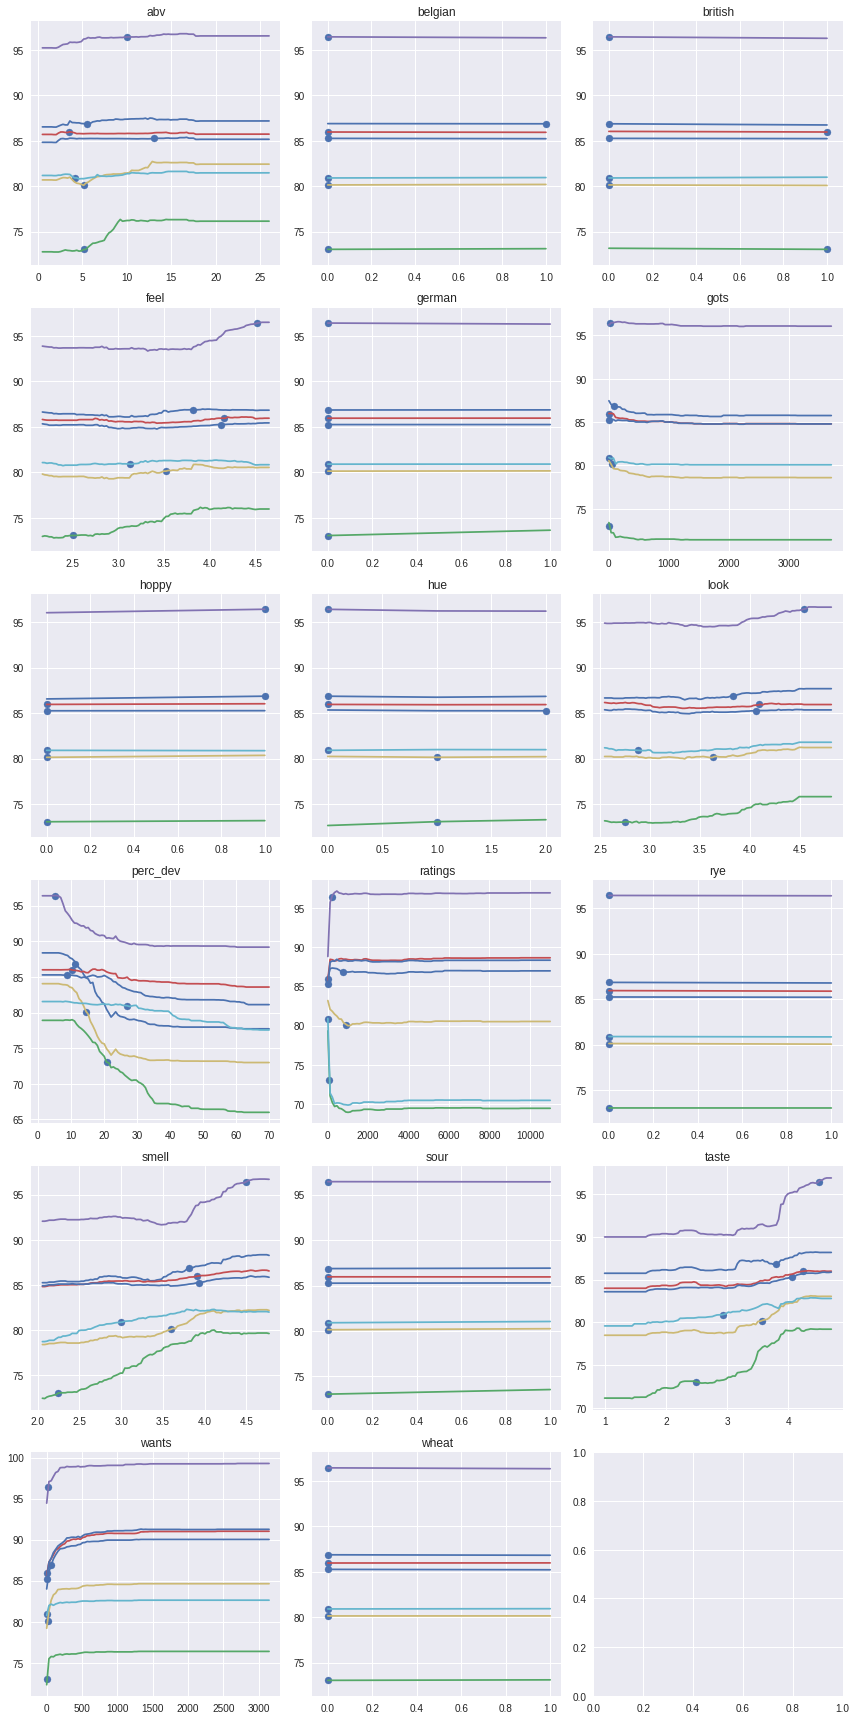

In [42]:
indices = mxr.feature_dependence_plots(num_pts=7)

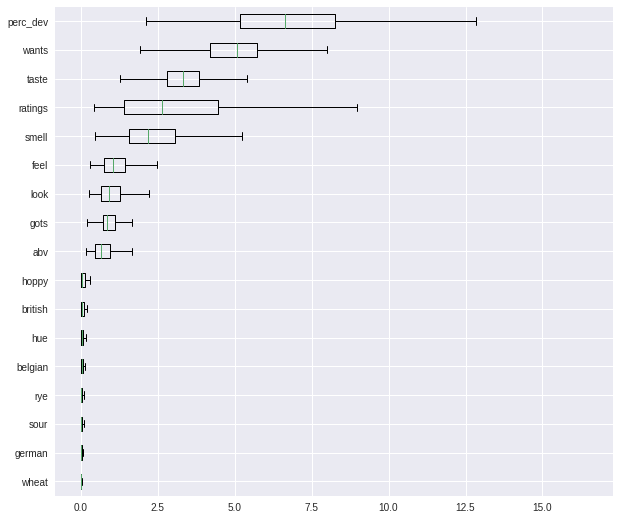

In [43]:
mxr.feature_effect_summary()

In [78]:
diff_path_obj = mxr.explain_prediction_difference(2551, 1824, tol=.005)

Your initial point has a target value of 85.2556
Your final point has a target value of 96.42
Changing ratings from 14.0 to 206.0
		changes your target by 3.0655 to 88.3211
----------
Changing smell from 3.9375 to 4.5
		changes your target by 1.7448 to 90.0659
----------
Changing wants from 1.0 to 20.0
		changes your target by 1.5244 to 91.5904
----------
Changing perc_dev from 8.77 to 5.41
		changes your target by 1.1995 to 92.7899
----------
Changing feel from 4.125 to 4.52
		changes your target by 1.0949 to 93.8848
----------
Changing taste from 4.0625 to 4.5
		changes your target by 0.9096 to 94.7943
----------
Changing look from 4.0625 to 4.54
		changes your target by 1.0676 to 95.862
----------
Changing hoppy from 0.0 to 1.0
		changes your target by 0.2423 to 96.1043
----------
Tolerance of 0.005 reached
Current value of 96.1043 is within 0.5% of 96.42


In [45]:
indices

array([1811, 3045, 3329, 1824, 1383, 1120, 2551])

# Single decision tree

In [39]:
tree_reg = tree.DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [41]:
tree.export_graphviz(tree_reg, out_file='beer_tree.dot',feature_names = X_train.columns)

In [42]:
!head beer_tree.dot

digraph Tree {
node [shape=box] ;
0 [label="taste <= 3.8597\nmse = 12.9454\nsamples = 30720\nvalue = 85.11"] ;
1 [label="taste <= 3.495\nmse = 6.3142\nsamples = 15882\nvalue = 82.9382"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="smell <= 3.245\nmse = 7.7831\nsamples = 4124\nvalue = 80.5291"] ;
1 -> 2 ;
3 [label="ratings <= 57.5\nmse = 10.6823\nsamples = 1302\nvalue = 78.8871"] ;
2 -> 3 ;
4 [label="taste <= 2.9857\nmse = 5.3324\nsamples = 992\nvalue = 79.8115"] ;


In [44]:
tree_reg.score(X_test, y_test)

0.85509930489373032

## Check contents of categories that seem to matter

### Is hoppy a proxy for American styles?

In [32]:
beer_data[beer_data.hoppy == 1]['style'].value_counts()
    

AmericanIPA                  5247
AmericanDoubleImperialIPA    2788
AmericanPaleAle              2369
BelgianPaleAle                555
AmericanBlackAle              518
BelgianStrongPaleAle          402
AmericanBarleywine            355
EnglishIndiaPaleAle           336
BelgianIPA                    299
EnglishBitter                 280
RyeBeer                       261
EnglishStrongAle               98
Name: style, dtype: int64

### Is belgian or german a proxy for sour?

In [33]:
beer_data[beer_data.sour == 1]['style'].value_counts()

AmericanWildAle              1163
BerlinerWeissbier             455
Gose                          290
Lambic-Fruit                  169
FlandersRedAle                 89
FlandersOudBruin               85
Gueuze                         57
Lambic-Unblended               26
Sahti                          15
BieredeChampagneBiereBrut      15
Faro                           11
Name: style, dtype: int64

In [34]:
beer_data[beer_data.belgian == 1]['style'].value_counts()

SaisonFarmhouseAle           1727
Witbier                       645
BelgianPaleAle                555
Tripel                        501
BelgianStrongPaleAle          402
BelgianStrongDarkAle          348
BelgianIPA                    299
Dubbel                        236
Quadrupel                     202
Lambic-Fruit                  169
BieredeGarde                  157
BelgianDarkAle                140
FlandersRedAle                 89
FlandersOudBruin               85
Gueuze                         57
Lambic-Unblended               26
BieredeChampagneBiereBrut      15
Faro                           11
Name: style, dtype: int64

In [35]:
beer_data[beer_data.german == 1]['style'].value_counts()

Hefeweizen           670
BerlinerWeissbier    455
Kolsch               375
Gose                 290
Altbier              178
Dunkelweizen         131
Weizenbock            92
Kristalweizen         33
Roggenbier            23
Name: style, dtype: int64

## Reduce feature space

In [38]:
catheavy_beer_data = beer_data.drop(['link', 'brewery', 'style',
                                     'score', 'reviews', 'look',
                                     'smell', 'taste', 'feel'], axis=1)

In [39]:
catheavy_beer_data.head()

,ba_score,ratings,perc_dev,wants,gots,abv,hoppy,wheat,rye,german,belgian,british,hue,sour
Illustrated Man Dark Sour with Berries-Independence Brewing Co,84.0,13,11.58,0,4,5.50,0,0,0,0,0,0,1,1
!!!PA Simcoe Mosaic-To Øl,82.0,13,27.83,0,1,13.00,1,0,0,0,0,0,0,0
"""633"" American Pale Ale-Boothbay Craft Brewery Watershed Tavern",84.0,24,13.46,0,3,6.33,1,0,0,0,0,0,0,0
"""Admiral"" Stash-Milwaukee Brewing Company",85.0,50,14.47,2,10,7.00,0,0,0,0,0,1,2,0
"""Keeper!""-The Phoenix Ale Brewery",83.0,24,13.74,0,3,6.30,0,0,0,0,1,0,1,0


In [40]:
X, y = catheavy_beer_data.drop('ba_score', axis=1), catheavy_beer_data['ba_score']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .1, random_state=42)

In [41]:
std = StandardScaler()
std.fit(X_train)

X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [42]:
alphavec = 10**np.linspace(-3,9,27)

lasso_model = LassoCV(alphas = alphavec, cv=10)
lasso_model.fit(X_tr,y_train)

coefs_lasso = lasso_model.coef_
sorted(zip(X_train.columns, coefs_lasso), key = lambda x: x[1], reverse=True)

[('ratings', 1.2653206231963028),
 ('abv', 0.97346666054569397),
 ('wants', 0.78559620440642663),
 ('sour', 0.46556622765277234),
 ('hoppy', 0.22658350816622208),
 ('hue', 0.15622756652655764),
 ('german', 0.040630440671076969),
 ('belgian', -0.027219472519735083),
 ('wheat', -0.036199118969989869),
 ('rye', -0.036655260060615022),
 ('british', -0.094976200055055776),
 ('gots', -0.86689845394668863),
 ('perc_dev', -1.7156405064726881)]

In [95]:
lasso_model.score(X_te, y_test)

0.50584924893628702

In [43]:
lasso_pred = lasso_model.predict(X_te)
np.sqrt(np.mean((lasso_pred - y_test)**2))

2.5880105545240029

In [96]:
beer_forest = ensemble.RandomForestRegressor(n_estimators = 1000, min_samples_leaf=5,
                                    n_jobs=-1, max_features='auto')

In [98]:
beer_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [99]:
beer_forest.score(X_test, y_test)

0.78954013421760538

In [100]:
sorted(zip(X.columns,beer_forest.feature_importances_), key = lambda x:x[1], reverse=True)

[('perc_dev', 0.44435507815539221),
 ('wants', 0.37118324620098386),
 ('ratings', 0.089066561329507951),
 ('abv', 0.055998868587999587),
 ('gots', 0.020023958385486505),
 ('hue', 0.005764895001690854),
 ('hoppy', 0.0043597181464033116),
 ('belgian', 0.0028459848920888891),
 ('sour', 0.0027548025123696369),
 ('british', 0.0021893948049908386),
 ('wheat', 0.00077990530976312195),
 ('german', 0.00066267963087348442),
 ('rye', 1.4907042450125261e-05)]

In [44]:
beer_gradboost_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=0.3, verbose=0,
             warm_start=False)

In [46]:
pred_boosttree = beer_gradboost_best.predict(X_test)
np.sqrt(np.mean((pred_boosttree - y_test)**2))

1.632348261313626

In [102]:
beer_gradboost_best.score(X_test, y_test)

0.80119640078512033

In [103]:
sorted(zip(X.columns,beer_gradboost_best.feature_importances_), key = lambda x:x[1], reverse=True)

[('perc_dev', 0.31255710891518651),
 ('ratings', 0.18400827125335209),
 ('wants', 0.17609354703752567),
 ('abv', 0.12801842511040734),
 ('gots', 0.096775053684608425),
 ('hue', 0.025050738469767322),
 ('hoppy', 0.017142203628853447),
 ('belgian', 0.017069848721923311),
 ('sour', 0.012809825692676729),
 ('british', 0.01115199921533089),
 ('german', 0.007690511716367086),
 ('wheat', 0.0073967515517957437),
 ('rye', 0.0042357150022054963)]

## Reduce feature space further

In [104]:
mostlycat_beer_data = beer_data.drop(['link', 'brewery', 'style',
                                     'score', 'reviews', 'look',
                                     'smell', 'taste', 'feel', 'perc_dev',
                                      'ratings', 'wants', 'gots'], axis=1)

In [108]:
X, y = mostlycat_beer_data.drop('ba_score', axis=1), mostlycat_beer_data['ba_score']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .1, random_state=42)

In [109]:
std = StandardScaler()
std.fit(X_train)

X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [110]:
alphavec = 10**np.linspace(-3,9,27)

lasso_model = LassoCV(alphas = alphavec, cv=10)
lasso_model.fit(X_tr,y_train)

coefs_lasso = lasso_model.coef_
sorted(zip(X_train.columns, coefs_lasso), key = lambda x: x[1], reverse=True)

[('abv', 1.3466279212894701),
 ('sour', 0.72484973041609069),
 ('hoppy', 0.39196484466089659),
 ('hue', 0.2391563085511923),
 ('german', 0.025950879552285536),
 ('belgian', -0.022811977716123276),
 ('rye', -0.047422892843221001),
 ('wheat', -0.093571989056211988),
 ('british', -0.16930196607847006)]

In [111]:
lasso_model.score(X_te, y_test)

0.18879680341479574

In [112]:
beer_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [113]:
beer_forest.score(X_test, y_test)

0.21989229184827686

In [114]:
sorted(zip(X.columns,beer_forest.feature_importances_), key = lambda x:x[1], reverse=True)

[('abv', 0.68416370429239748),
 ('sour', 0.10233641290766618),
 ('hue', 0.065054088191525333),
 ('belgian', 0.055398532877243105),
 ('hoppy', 0.03177181447398511),
 ('british', 0.027203635168405241),
 ('wheat', 0.021598983326262745),
 ('german', 0.010025960089601051),
 ('rye', 0.0024468686729145119)]

In [115]:
beer_gradboost_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=0.3, verbose=0,
             warm_start=False)

In [116]:
beer_gradboost_best.score(X_test, y_test)

0.22716730918482053

In [117]:
sorted(zip(X.columns,beer_gradboost_best.feature_importances_), key = lambda x:x[1], reverse=True)

[('abv', 0.6557079498962497),
 ('hue', 0.088836274669466211),
 ('belgian', 0.054796702529224729),
 ('british', 0.051928403408307532),
 ('hoppy', 0.045270752745275401),
 ('sour', 0.044906957839967655),
 ('wheat', 0.027699074085782541),
 ('german', 0.020885771370475838),
 ('rye', 0.0099681134552502895)]